In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("happiness_score_dataset.csv") #Reading the data
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data.describe() #overview of dataset  --no missing values

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

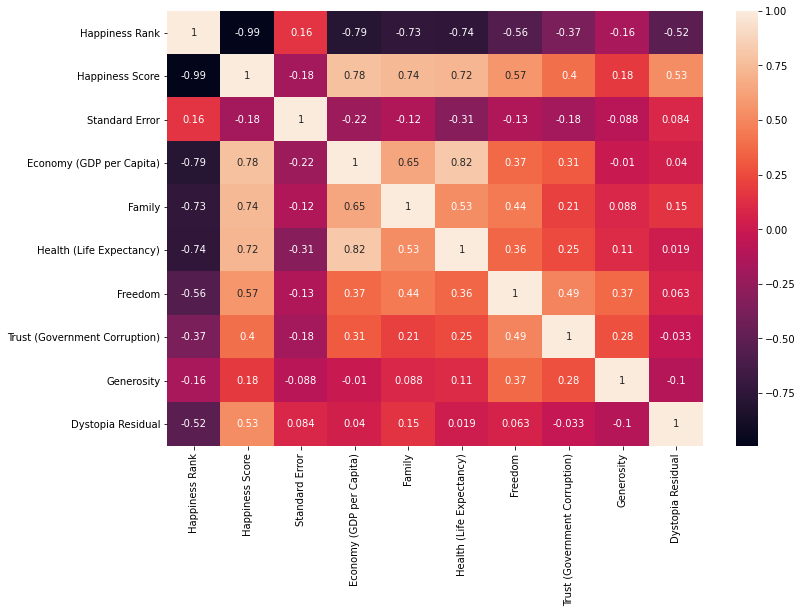

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

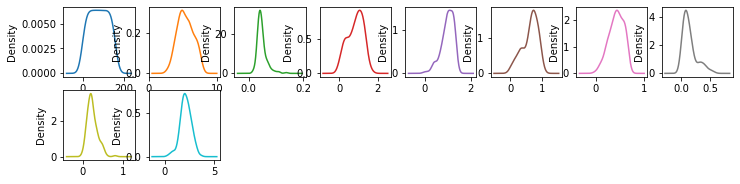

In [8]:
data.plot(kind='density',subplots=True,layout=(8,8),sharex=False,legend=False,figsize=(12,12))
plt.show()

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

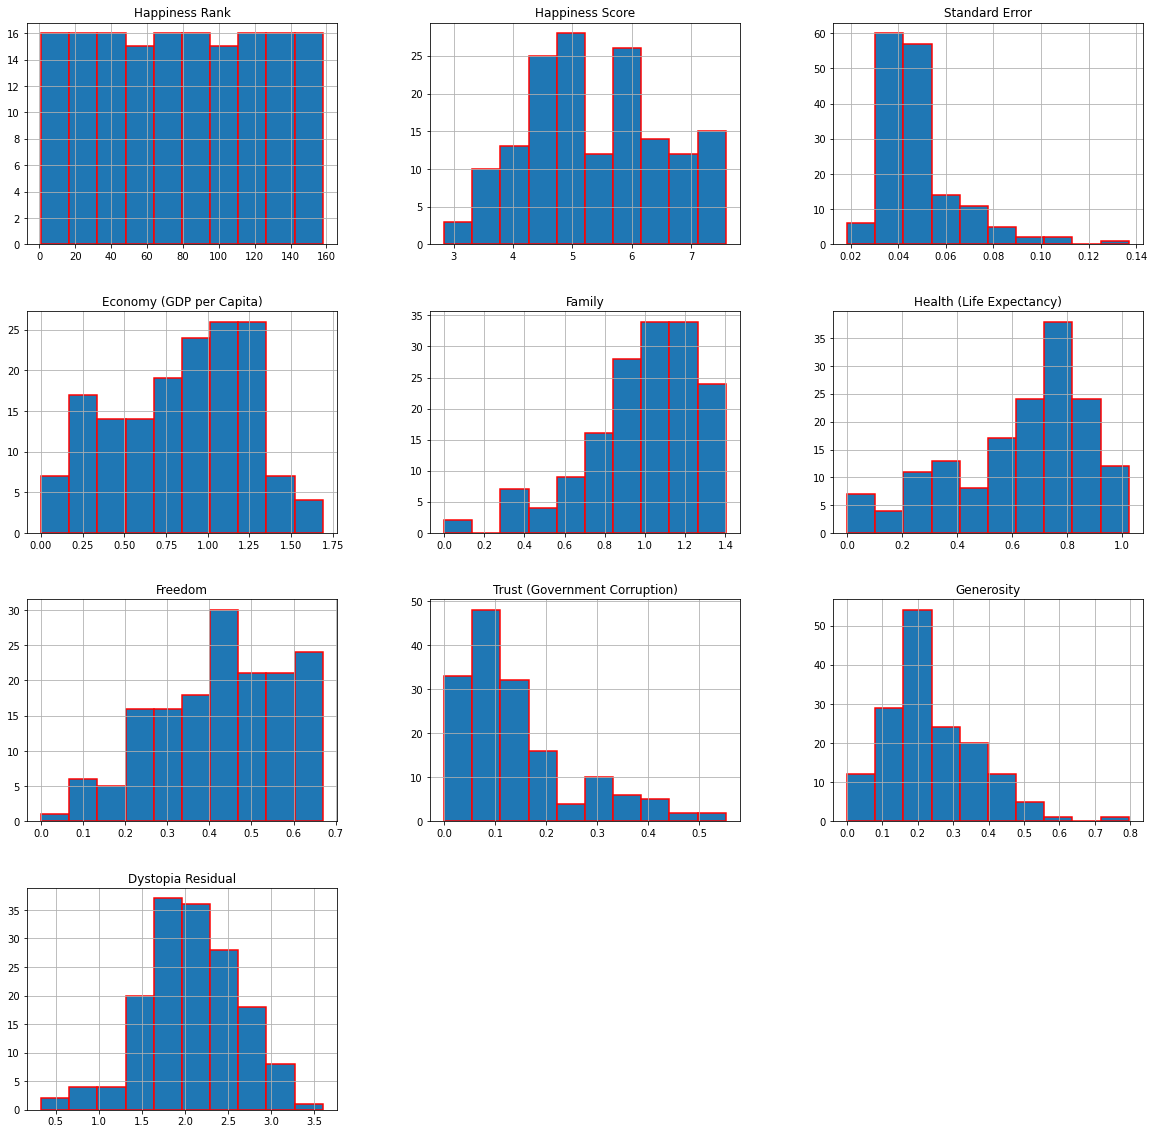

In [9]:
data.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [10]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:>

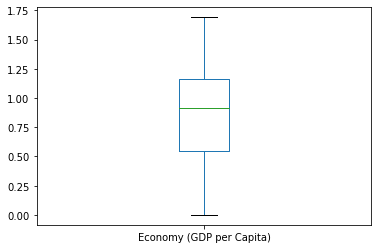

In [11]:
data["Economy (GDP per Capita)"].plot.box()

<AxesSubplot:>

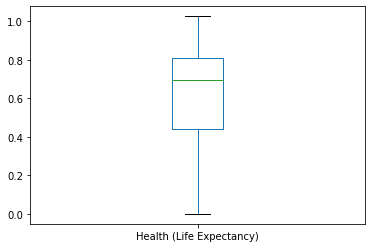

In [12]:
data["Health (Life Expectancy)"].plot.box()

<AxesSubplot:>

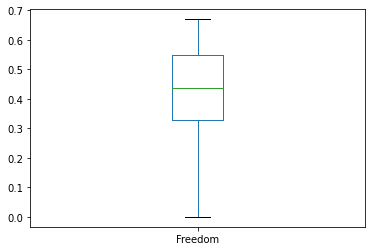

In [13]:
data["Freedom"].plot.box()

<AxesSubplot:>

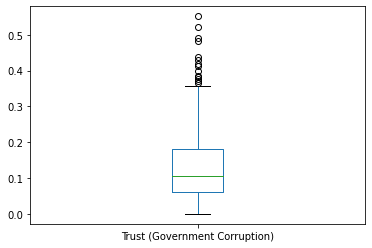

In [14]:
data["Trust (Government Corruption)"].plot.box()

__Using One Hot Encoding for Country and Region__

In [15]:
Country_N=pd.get_dummies(data['Country'],drop_first=True)
Country_N

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Region_n=pd.get_dummies(data['Region'],drop_first=True)
Region_n

,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,1,0
155,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,1,0


__Dropping encoded columns__

In [17]:
data.drop(["Country","Region"],axis=1,inplace=True)

In [18]:
data.shape

(158, 10)

In [ ]:
data.head()

__Concatinating encoded columns__

In [19]:
data=pd.concat([data,Region_n,Country_N],axis=1)

In [20]:
data.shape

(158, 176)

In [21]:
x=data.drop('Happiness Score',axis=1)

In [22]:
x.shape

(158, 175)

In [23]:
y=data['Happiness Score']

In [24]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [25]:
y.shape

(158,)

__Applying ML algos__

In [26]:

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
lr=LinearRegression()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [29]:
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_test.size)

22050
126
5600
32


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [38]:
ls= Lasso(alpha=0.1, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean()
    print(" At CV :- ", j)
    print(":corss validation score is :- ", lsc*100)
    print("R2_score is :- ", lss*100)
    print("\n")

 At CV :-  2
:corss validation score is :-  69.96358544498236
R2_score is :-  98.52412359537134


 At CV :-  3
:corss validation score is :-  80.33364805286162
R2_score is :-  98.52412359537134


 At CV :-  4
:corss validation score is :-  65.24883098388862
R2_score is :-  98.52412359537134


 At CV :-  5
:corss validation score is :-  43.653394288996076
R2_score is :-  98.52412359537134


 At CV :-  6
:corss validation score is :-  24.52016691416822
R2_score is :-  98.52412359537134


 At CV :-  7
:corss validation score is :-  -6.121497450598442
R2_score is :-  98.52412359537134


 At CV :-  8
:corss validation score is :-  -20.904410988027433
R2_score is :-  98.52412359537134


 At CV :-  9
:corss validation score is :-  -35.87521091343439
R2_score is :-  98.52412359537134




In [39]:
ls.score(x_test,y_test)

0.9852412359537134

In [40]:
r2_score(y_test,pred_ls)

0.9852412359537134

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [42]:
print ("Error :")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Squared error:", mean_squared_error(y_test,pred_ls))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_ls)))

Error :
Mean Absolute Error: 0.10391052950349412
Mean Squared error: 0.02093900639230089
Root Mean squared error:  0.14470316649023576


__Decision Tree__

In [43]:
from sklearn.tree import DecisionTreeRegressor

parameters= {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'mae', 'splitter': 'best'}


In [44]:
dt = DecisionTreeRegressor(criterion='mae', splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decission = dt.predict(x_test)

dts= r2_score(y_test,pred_decission)
print("r2 Score :", dts*100)

dtscore= cross_val_score(dt,x,y,cv=3)
dtc = dtscore.mean()
print('Cross Validation score',dtc*100)

r2 Score : 99.62054202965834
Cross Validation score -143.67057562117597


In [45]:
print ("Error :")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_decission))
print("Mean Squared error:", mean_squared_error(y_test,pred_decission))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decission)))

Error :
Mean Absolute Error: 0.05175000000000002
Mean Squared error: 0.005383562499999997
Root Mean squared error:  0.0733727640204456


__Random Forest__

In [47]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


In [48]:
rf = RandomForestRegressor(criterion='mae', n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs= r2_score(y_test,pred_random)
print("r2 Score :", rfs*100)

rfscore= cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean()
print('Cross Validation score',rfc*100)

r2 Score : 99.75327342234385
Cross Validation score -154.64845554297574


__Best Model is Random Forest, so we can save it.__

In [50]:
import pickle
filename='Happiness_score'
pickle.dump(rf,open(filename,'wb'))